## Part 1 - NBA Player Comparision

In [1]:
# As usual, we begin by importing the packages we will need

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# The data consists of the shot log for the NBA season 2016/17

shot = pd.read_csv("Assignment Data/Week 3/NBA shotlog_16_17.csv")
pd.set_option('display.max_columns', 100)
print(shot.columns.tolist())
shot.describe()

['self_previous_shot', 'player_position', 'home_game', 'location_x', 'opponent_previous_shot', 'home_team', 'shot_type', 'points', 'away_team', 'location_y', 'time', 'date', 'shoot_player', 'time_from_last_shot', 'quarter', 'current_shot_outcome']


,location_x,points,location_y,time_from_last_shot,quarter
count,209675.000000,210072.000000,209675.00000,200072.000000,210072.000000
mean,468.524507,2.316130,249.44723,33.279489,2.480383
std,345.063654,0.464965,111.02320,19.797357,1.136841
min,0.000000,2.000000,0.00000,0.000000,1.000000
25%,94.000000,2.000000,197.00000,22.000000,1.000000
50%,342.000000,2.000000,250.00000,31.000000,2.000000
75%,843.000000,3.000000,303.00000,41.000000,3.000000
max,933.000000,3.000000,500.00000,255.000000,8.000000


## Westbrook - Durant Comparision

In [8]:
shot['halfcourt_x'] =np.where(shot['location_x'] < 933/2, 933 - shot['location_x'],shot['location_x'])
shot['halfcourt_y'] =np.where(shot['location_x'] < 933/2, 500 - shot['location_y'],shot['location_y'])
shot.describe()

,location_x,points,location_y,time_from_last_shot,quarter,halfcourt_x,halfcourt_y
count,209675.000000,210072.000000,209675.00000,200072.000000,210072.000000,209675.000000,209675.000000
mean,468.524507,2.316130,249.44723,33.279489,2.480383,799.731480,250.303947
std,345.063654,0.464965,111.02320,19.797357,1.136841,89.606222,111.024160
min,0.000000,2.000000,0.00000,0.000000,1.000000,468.000000,0.000000
25%,94.000000,2.000000,197.00000,22.000000,1.000000,720.000000,197.000000
50%,342.000000,2.000000,250.00000,31.000000,2.000000,841.000000,250.000000
75%,843.000000,3.000000,303.00000,41.000000,3.000000,878.000000,303.000000
max,933.000000,3.000000,500.00000,255.000000,8.000000,933.000000,500.000000


Text(0.5, 1.0, 'Russell Westbrook')

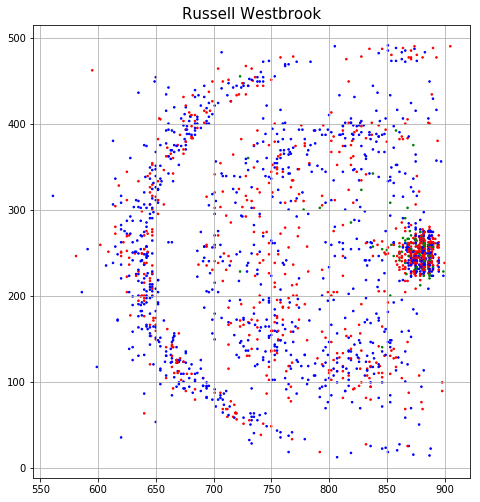

In [12]:
Westbrook = shot[shot['shoot_player'] == 'Russell Westbrook']
hxW = Westbrook['halfcourt_x']
hyW = Westbrook['halfcourt_y']
colors = np.where(Westbrook['current_shot_outcome']=='SCORED','r',np.where(Westbrook['current_shot_outcome']=='MISSED','b','g'))
plt.figure(figsize=(94/12,50/6))
plt.scatter(hxW,hyW, s=10, c= colors, marker= '.')
plt.grid(True)
plt.title("Russell Westbrook", fontsize = 15)

Text(0.5, 1.0, 'Kevin Durant')

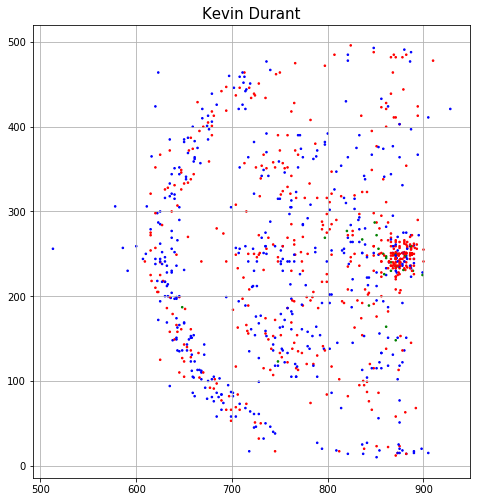

In [13]:
Durant = shot[shot['shoot_player'] == 'Kevin Durant']
hxD = Durant['halfcourt_x']
hyD = Durant['halfcourt_y']
colors = np.where(Durant['current_shot_outcome']=='SCORED','r',np.where(Durant['current_shot_outcome']=='MISSED','b','g'))
plt.figure(figsize=(94/12,50/6))
plt.scatter(hxD,hyD, s=10, c= colors, marker= '.')
plt.grid(True)
plt.title("Kevin Durant", fontsize = 15)

Text(0.5, 1.0, 'Kevin Durant')

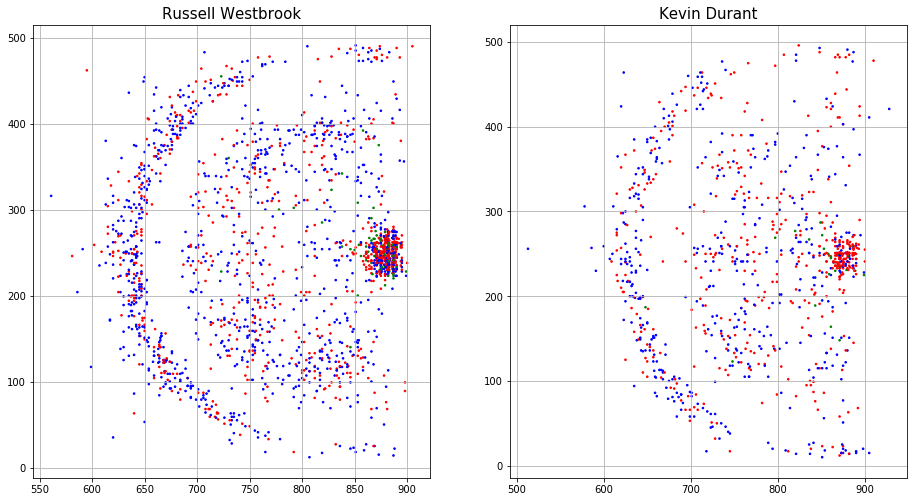

In [14]:
# Russell Westbrook and Kevin Durant side by side

f = plt.figure(figsize=(94/6,50/6))
ax = f.add_subplot(121)
colors = np.where(Westbrook['current_shot_outcome']=='SCORED','r',np.where(Westbrook['current_shot_outcome']=='MISSED','b','g'))
ax = plt.scatter(hxW,hyW, s=10, c= colors, marker= '.')
plt.grid(True)
plt.title("Russell Westbrook", fontsize = 15)
ax = f.add_subplot(122)
colors = np.where(Durant['current_shot_outcome']=='SCORED','r',np.where(Durant['current_shot_outcome']=='MISSED','b','g'))
ax = plt.scatter(hxD,hyD, s=10, c= colors, marker= '.')
plt.grid(True)
plt.title("Kevin Durant", fontsize = 15)

## Jordan - Howard Comparision

In [15]:
shot['shoot_player'].value_counts()

Russell Westbrook        1940
Andrew Wiggins           1568
DeMar DeRozan            1545
James Harden             1532
Anthony Davis            1525
Damian Lillard           1489
Karl-Anthony Towns       1479
Isaiah Thomas            1473
Kemba Walker             1451
Stephen Curry            1444
CJ McCollum              1441
John Wall                1434
DeMarcus Cousins         1433
Devin Booker             1430
Kyrie Irving             1420
Carmelo Anthony          1390
Klay Thompson            1376
Paul George              1348
LeBron James             1344
Bradley Beal             1321
Kawhi Leonard            1312
Harrison Barnes          1280
Giannis Antetokounmpo    1257
Jimmy Butler             1252
Dennis Schroder          1215
Brook Lopez              1173
Marc Gasol               1160
Gordon Hayward           1154
Goran Dragic             1125
Jordan Clarkson          1069
                         ... 
Jordan Hill                13
Diamond Stone              13
Manny Harr

Text(0.5, 1.0, 'Dwight Howard')

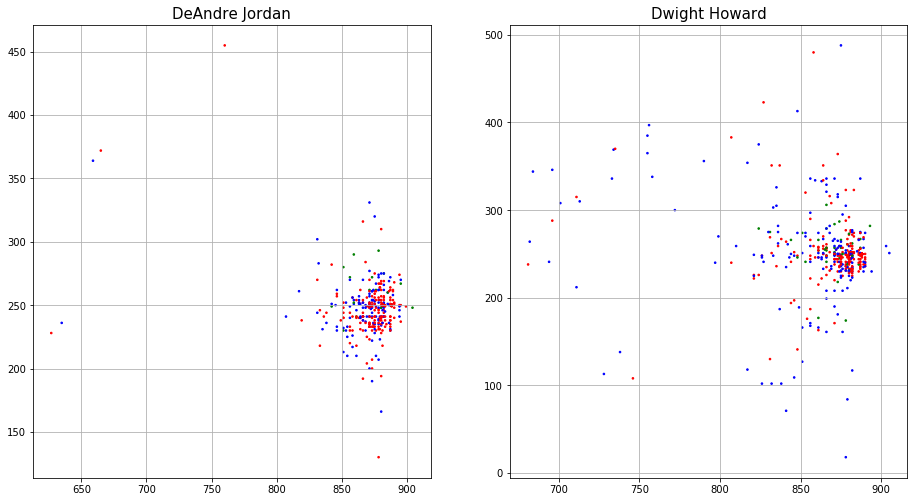

In [23]:
# DeAndre Jordan and Dwight Howard
# shot[shot['shoot_player'].str.contains('Jordan')].shoot_player.value_counts()

Jordan = shot[shot['shoot_player'] == 'DeAndre Jordan']
hxJ = Jordan['halfcourt_x']
hyJ = Jordan['halfcourt_y']

Howard = shot[shot['shoot_player'] == 'Dwight Howard']
hxH = Howard['halfcourt_x']
hyH = Howard['halfcourt_y']

f = plt.figure(figsize=(94/6,50/6))
ax = f.add_subplot(121)
colors = np.where(Jordan['current_shot_outcome']=='SCORED','r',np.where(Jordan['current_shot_outcome']=='MISSED','b','g'))
ax = plt.scatter(hxJ,hyJ, s=10, c= colors, marker= '.')
plt.grid(True)
plt.title("DeAndre Jordan", fontsize = 15)
ax = f.add_subplot(122)
colors = np.where(Howard['current_shot_outcome']=='SCORED','r',np.where(Howard['current_shot_outcome']=='MISSED','b','g'))
ax = plt.scatter(hxH,hyH, s=10, c= colors, marker= '.')
plt.grid(True)
plt.title("Dwight Howard", fontsize = 15)

## Lopez - Lopez Comparision

Text(0.5, 1.0, 'Robin Lopez')

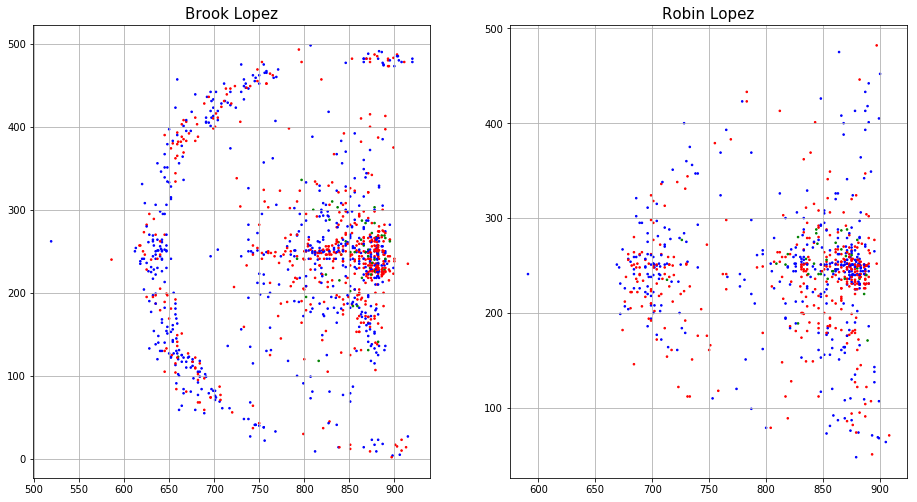

In [21]:
# Brook Lopez and Robin Lopez

Brook = shot[shot['shoot_player'] == 'Brook Lopez']
hxB = Brook['halfcourt_x']
hyB = Brook['halfcourt_y']

Robin = shot[shot['shoot_player'] == 'Robin Lopez']
hxR = Robin['halfcourt_x']
hyR = Robin['halfcourt_y']

f = plt.figure(figsize=(94/6,50/6))
ax = f.add_subplot(121)
colors = np.where(Brook['current_shot_outcome']=='SCORED','r',np.where(Brook['current_shot_outcome']=='MISSED','b','g'))
ax = plt.scatter(hxB,hyB, s=10, c= colors, marker= '.')
plt.grid(True)
plt.title("Brook Lopez", fontsize = 15)
ax = f.add_subplot(122)
colors = np.where(Robin['current_shot_outcome']=='SCORED','r',np.where(Robin['current_shot_outcome']=='MISSED','b','g'))
ax = plt.scatter(hxR,hyR, s=10, c= colors, marker= '.')
plt.grid(True)
plt.title("Robin Lopez", fontsize = 15)

In [22]:
shot

,self_previous_shot,player_position,home_game,location_x,opponent_previous_shot,home_team,shot_type,points,away_team,location_y,time,date,shoot_player,time_from_last_shot,quarter,current_shot_outcome,halfcourt_x,halfcourt_y
0,NaN,SF,Yes,97.0,SCORED,ATL,Pullup Jump Shot,2,WAS,405.0,1:09,10/27/2016,Kent Bazemore,NaN,1,MISSED,836.0,95.0
1,MISSED,C,Yes,52.0,SCORED,ATL,Tip Dunk Shot,2,WAS,250.0,1:11,10/27/2016,Dwight Howard,2.0,1,SCORED,881.0,250.0
2,SCORED,SG,Yes,239.0,MISSED,ATL,Jump Shot,2,WAS,223.0,1:41,10/27/2016,Kyle Korver,30.0,1,SCORED,694.0,277.0
3,SCORED,PG,Yes,102.0,SCORED,ATL,Pullup Jump Shot,2,WAS,385.0,2:16,10/27/2016,Dennis Schroder,35.0,1,SCORED,831.0,115.0
4,SCORED,PF,Yes,128.0,MISSED,ATL,Turnaround Jump Shot,2,WAS,265.0,2:40,10/27/2016,Paul Millsap,24.0,1,MISSED,805.0,235.0
5,MISSED,PG,Yes,210.0,SCORED,ATL,Pullup Jump Shot,2,WAS,267.0,3:07,10/27/2016,Dennis Schroder,27.0,1,MISSED,723.0,233.0
6,MISSED,SF,Yes,279.0,SCORED,ATL,Jump Shot,3,WAS,130.0,3:11,10/27/2016,Kent Bazemore,4.0,1,MISSED,654.0,370.0
7,MISSED,PG,Yes,58.0,SCORED,ATL,Driving Layup,2,WAS,262.0,4:01,10/27/2016,Dennis Schroder,50.0,1,MISSED,875.0,238.0
8,MISSED,C,Yes,107.0,SCORED,ATL,Turnaround Jump Shot,2,WAS,254.0,4:04,10/27/2016,Dwight Howard,3.0,1,MISSED,826.0,246.0
9,MISSED,PF,Yes,167.0,MISSED,ATL,Pullup Jump Shot,2,WAS,306.0,4:51,10/27/2016,Paul Millsap,47.0,1,SCORED,766.0,194.0
